# Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import dataset

In [5]:
df = pd.read_csv('onlinefraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Description

## About the Dataset

To identify online payment fraud with machine learning, we need to train a model capable of classifying transactions as fraudulent or non-fraudulent. This requires a dataset containing detailed information on online payment transactions, specifically those flagged for fraud. The dataset I collected from Kaggle includes historical data on fraudulent transactions, which will be instrumental in training our fraud detection model. Below is a description of the columns included in this dataset:

1. **step**: Represents a unit of time, where 1 step equals 1 hour.
2. **type**: Type of online transaction.
3. **amount**: The amount of the transaction.
4. **nameOrig**: Customer initiating the transaction.
5. **oldbalanceOrg**: Account balance before the transaction.
6. **newbalanceOrig**: Account balance after the transaction.
7. **nameDest**: Recipient of the transaction.
8. **oldbalanceDest**: Initial balance of the recipient before the transaction.
9. **newbalanceDest**: New balance of the recipient after the transaction.
10. **isFraud**: Indicator of whether the transaction is fraudulent (1) or not (0).

This dataset forms the foundation of our machine learning model to detect online payment fraud. In the following sections, I will outline the methods and Python tools we'll use to develop and test our fraud detection model.


# Explore the dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


## Now, we don't need nameOrig and nameDest columns for our analysis. Hence, we will drop these two columns. Additionally, we also have isFlaggedFraud column which is actually a prediction. we don't need this right now hence we will be dropping this column too.

In [12]:
cols_to_drop = ['nameOrig', 'nameDest', 'isFlaggedFraud']

In [14]:
df.drop(columns=cols_to_drop,inplace = True)

In [16]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [18]:
df.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

## We don't have any null values

In [21]:
df.duplicated().sum()

543

## We will remove duplicated data.

In [24]:
df.drop_duplicates(inplace = True)

In [25]:
df.duplicated().sum()

0

In [26]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362077e+06,6.362077e+06,6.362077e+06,6.362077e+06,6.362077e+06,6.362077e+06,6.362077e+06
mean,2.433995e+02,1.798531e+05,8.339307e+05,8.551867e+05,1.100796e+06,1.225077e+06,1.288416e-03
std,1.423323e+02,6.036937e+05,2.888322e+06,2.924163e+06,3.399310e+06,3.674244e+06,3.587138e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.339407e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.489334e+04,1.421800e+04,0.000000e+00,1.327834e+05,2.147385e+05,0.000000e+00
75%,3.350000e+02,2.087330e+05,1.073260e+05,1.442925e+05,9.431718e+05,1.112051e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [30]:
df['step'].value_counts()

step
19     51340
18     49572
187    49070
235    47480
307    46965
       ...  
432        4
706        4
693        4
112        2
662        2
Name: count, Length: 743, dtype: int64

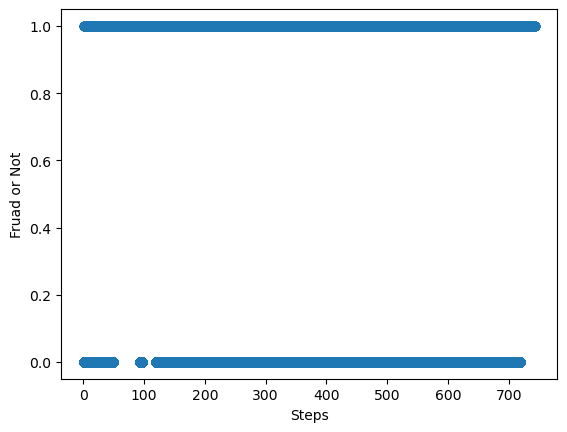

In [32]:
plt.scatter(df['step'],df['isFraud'])
plt.xlabel('Steps')
plt.ylabel('Fruad or Not')
plt.show()

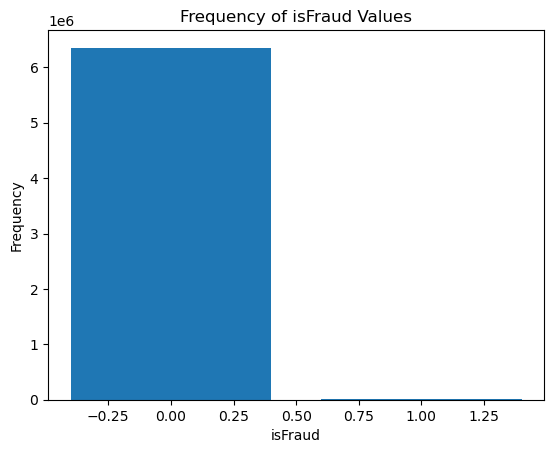

In [34]:
counts = df['isFraud'].value_counts()

# Plotting
plt.bar(counts.index, counts.values)
plt.xlabel('isFraud')
plt.ylabel('Frequency')
plt.title('Frequency of isFraud Values')
plt.show()

In [36]:
len(df[df['isFraud'] == 1])

8197

In [38]:
len(df[df['isFraud'] == 0])

6353880

## Our dataset is highly imbalanced we need to make some changes otherwise our model will be biased

In [41]:
df['type'].value_counts()

type
CASH_OUT    2237484
PAYMENT     2150968
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

## We need to change the type column into the category

In [44]:
df['type'] = df['type'].astype('category')

Text(0.5, 1.0, 'Frequency and Percentage of Different Types')

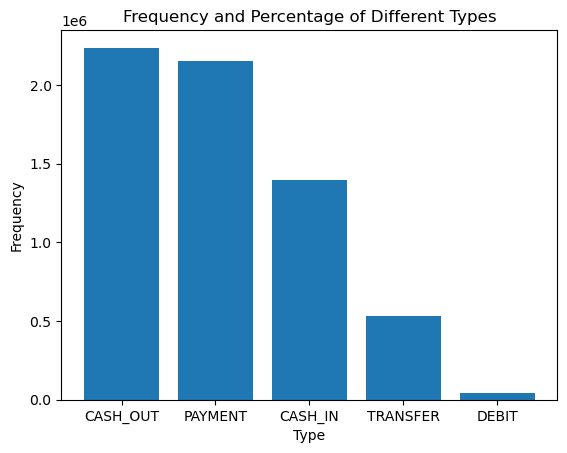

In [46]:
counts = df['type'].value_counts()

# Calculate the percentage of each category
percentages = 100 * counts / counts.sum()

# Plotting
plt.bar(counts.index, counts.values)
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.title('Frequency and Percentage of Different Types')

In [48]:
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

## We will convert these categories into numeric form

In [51]:
x= pd.get_dummies(df['type'],drop_first= True)

In [53]:
x

,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,False,False,True,False
1,False,False,True,False
2,False,False,False,True
3,True,False,False,False
4,False,False,True,False
...,...,...,...,...
6362615,True,False,False,False
6362616,False,False,False,True
6362617,True,False,False,False
6362618,False,False,False,True


In [55]:
df.drop(columns = 'type',inplace = True)
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,181.00,181.00,0.00,0.00,0.00,1
3,1,181.00,181.00,0.00,21182.00,0.00,1
4,1,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1


In [57]:
merged_df = pd.concat([df, x], axis = 1)
merged_df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,False,False,True,False
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,False,False,True,False
2,1,181.00,181.00,0.00,0.00,0.00,1,False,False,False,True
3,1,181.00,181.00,0.00,21182.00,0.00,1,True,False,False,False
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,True,False,False,False
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,False,False,False,True
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,True,False,False,False
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,False,False,False,True


## Extract the features and target

In [60]:
X = merged_df.drop(columns= 'isFraud')
y = merged_df['isFraud']

In [62]:
X

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,False,False,True,False
1,1,1864.28,21249.00,19384.72,0.00,0.00,False,False,True,False
2,1,181.00,181.00,0.00,0.00,0.00,False,False,False,True
3,1,181.00,181.00,0.00,21182.00,0.00,True,False,False,False
4,1,11668.14,41554.00,29885.86,0.00,0.00,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,True,False,False,False
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,False,False,False,True
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,True,False,False,False
6362618,743,850002.52,850002.52,0.00,0.00,0.00,False,False,False,True


In [64]:
y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362077, dtype: int64

In [66]:
!pip install imblearn

In [68]:
from imblearn.under_sampling import NearMiss

In [74]:
nm = NearMiss(version = 3)
X_res, y_res = nm.fit_resample(X, y)

C:\Users\iamya\anaconda3\Lib\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:203: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


In [76]:
X_res.shape

(15280, 10)

In [78]:
y_res.shape

(15280,)

## Split the data into training and testing

In [81]:
from sklearn.model_selection import train_test_split

In [83]:
X_train,X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)

In [85]:
X_train

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_OUT,DEBIT,PAYMENT,TRANSFER
7191,9,244068.01,244068.01,0.00,0.00,338538.16,True,False,False,False
4153,187,152192.10,150604.18,0.00,285291.98,437484.08,True,False,False,False
8992,169,1179716.49,1179716.49,0.00,0.00,1179716.49,True,False,False,False
4304,381,117345.56,110037.00,0.00,69882.55,187228.11,True,False,False,False
12970,531,3547485.43,3547485.43,0.00,0.00,0.00,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
5191,135,244126.73,244575.00,448.27,0.00,244126.73,True,False,False,False
13418,573,457789.14,457789.14,0.00,0.00,457789.14,True,False,False,False
5390,227,175005.04,175827.00,821.96,0.00,175005.04,True,False,False,False
860,379,111957.76,91936.00,0.00,559448.46,247997.65,True,False,False,False


In [87]:
y_train

7191     1
4153     0
8992     1
4304     0
12970    1
        ..
5191     0
13418    1
5390     0
860      0
7270     1
Name: isFraud, Length: 12224, dtype: int64

## Data Preprocessing

In [90]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [92]:
X_train = scaler.fit_transform(X_train)

In [94]:
X_test = scaler.transform(X_test)

In [96]:
X_train.shape

(12224, 10)

In [98]:
X_test.shape

(3056, 10)

## Let's build our ANN

In [101]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Dropout

In [109]:
model = Sequential()
model.add(Input(shape = (X_train.shape[1],))),
model.add(Dense(8,activation='relu')),
model.add(Dense(4,activation='relu')),
model.add(Dense(2,activation='relu')),
model.add(Dropout(0.05))
#model.add(Dense(12,activation='relu')),
#model.add(Dense(10,activation='relu')),
model.add(Dense(1, activation = 'sigmoid'))

In [111]:
model.compile(optimizer = 'adam',loss= 'binary_crossentropy',metrics = ['accuracy'])

In [117]:
model.fit(X_train, y_train, epochs= 20, verbose = 1, batch_size=32, validation_split=0.2)

Epoch 1/20
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7989 - loss: 0.4630 - val_accuracy: 0.8303 - val_loss: 0.4158
Epoch 2/20
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8048 - loss: 0.4459 - val_accuracy: 0.8344 - val_loss: 0.4083
Epoch 3/20
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8145 - loss: 0.4344 - val_accuracy: 0.8368 - val_loss: 0.4088
Epoch 4/20
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8167 - loss: 0.4350 - val_accuracy: 0.8401 - val_loss: 0.3979
Epoch 5/20
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8204 - loss: 0.4215 - val_accuracy: 0.8348 - val_loss: 0.3942
Epoch 6/20
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8131 - loss: 0.4284 - val_accuracy: 0.8380 - val_loss: 0.3896
Epoch 7/20
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8235 - loss: 0.4159 - val_accuracy: 0.8405 - val_loss: 0.3899
Epoch 8/20
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8168 - loss: 0.4246 - val_accuracy: 0.

In [119]:
history = model.history

In [121]:
model.predict(X_test)

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.99999493],
       [0.9999679 ],
       [0.69673455],
       ...,
       [0.74774706],
       [0.1943732 ],
       [0.21349598]], dtype=float32)

In [123]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - accuracy: 0.8556 - loss: 0.3602
Test Loss: 0.36462610960006714
Test Accuracy: 0.8537303805351257


# Decision Tree

In [126]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [194]:
clf = DecisionTreeClassifier()

In [196]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [198]:
# Predict on test data
y_pred = clf.predict(X_test)

In [200]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 90.97%
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      1420
           1       0.92      0.92      0.92      1636

    accuracy                           0.91      3056
   macro avg       0.91      0.91      0.91      3056
weighted avg       0.91      0.91      0.91      3056



In [145]:
from sklearn.model_selection import GridSearchCV

In [165]:
# Create a dictionary of all values we want to test for n_neighbors
param_grid = {
   'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

In [167]:
# Use grid search to test all values for hyperparameters
dtree_gscv = GridSearchCV(clf, param_grid, cv=5)  # cv is the number of folds; increase it for more rigorous testing

In [169]:
# Fit model to data
dtree_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [171]:
# Check top performing hyperparameters
best_parameters = dtree_gscv.best_params_

In [173]:
# Check mean score for the top performing value of hyperparameters
best_score = dtree_gscv.best_score_

In [175]:
print("Best parameters:", best_parameters)
print("Best cross-validation score:", best_score)

Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best cross-validation score: 0.9154942281753403


In [180]:
report = classification_report(y_test, y_pred)

In [184]:
print(report)

              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1420
           1       0.80      0.79      0.80      1636

    accuracy                           0.78      3056
   macro avg       0.78      0.78      0.78      3056
weighted avg       0.78      0.78      0.78      3056



# Logistics Regression

In [202]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [204]:
lr.fit(X_train, y_train)

LogisticRegression()

In [206]:
# Predict on test data
y_pred = lr.predict(X_test)

In [208]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 78.44%
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.78      0.77      1420
           1       0.80      0.79      0.80      1636

    accuracy                           0.78      3056
   macro avg       0.78      0.78      0.78      3056
weighted avg       0.78      0.78      0.78      3056

